In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

### Leitura da planilha

In [ ]:
coleta = pd.read_excel('Dados coletados - refactoring.xlsx', sheet_name='coleta')
perfil = pd.read_excel('Dados coletados - refactoring.xlsx', sheet_name='perfil dos participantes')

df = pd.merge(coleta, perfil, on='ID', how='left')


Remoção de colunas 'Unnamed'

In [15]:

df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
display(df)


,ID,Ferramenta,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design,Formacao,Experiencia,Conhecimento_Refatoracao,Conhecimento_Java
0,P1,Tradicional,2.600586,137.462598,3,3,Mestrado,6+ anos,Nenhum,Razoável
1,P2,Tradicional,2.222081,174.035875,2,5,Graduação,1-2 anos,Razoável,Básico
2,P3,Tradicional,2.855597,190.403095,2,5,Graduação,1-2 anos,Avançado,Razoável
3,P4,Tradicional,2.964427,176.679971,0,3,Mestrado,3-5 anos,Básico,Básico
4,P5,Tradicional,2.460526,228.271272,5,6,Mestrado,6+ anos,Nenhum,Básico
...,...,...,...,...,...,...,...,...,...,...
115,P116,SmartRefactor,2.325355,135.311702,0,4,Mestrado,< 1 ano,Básico,Nenhum
116,P117,SmartRefactor,2.441287,134.556471,1,5,Mestrado,1-2 anos,Básico,Razoável
117,P118,SmartRefactor,2.468109,116.797407,1,2,Mestrado,6+ anos,Nenhum,Nenhum
118,P119,SmartRefactor,1.653404,124.803298,0,0,Graduação,3-5 anos,Razoável,Razoável


### Dataframes

In [38]:
tradicional = df[df['Ferramenta'] == 'Tradicional'].reset_index()
smartRefactor = df[df['Ferramenta'] == 'SmartRefactor'].reset_index()


### Perfil dos participantes

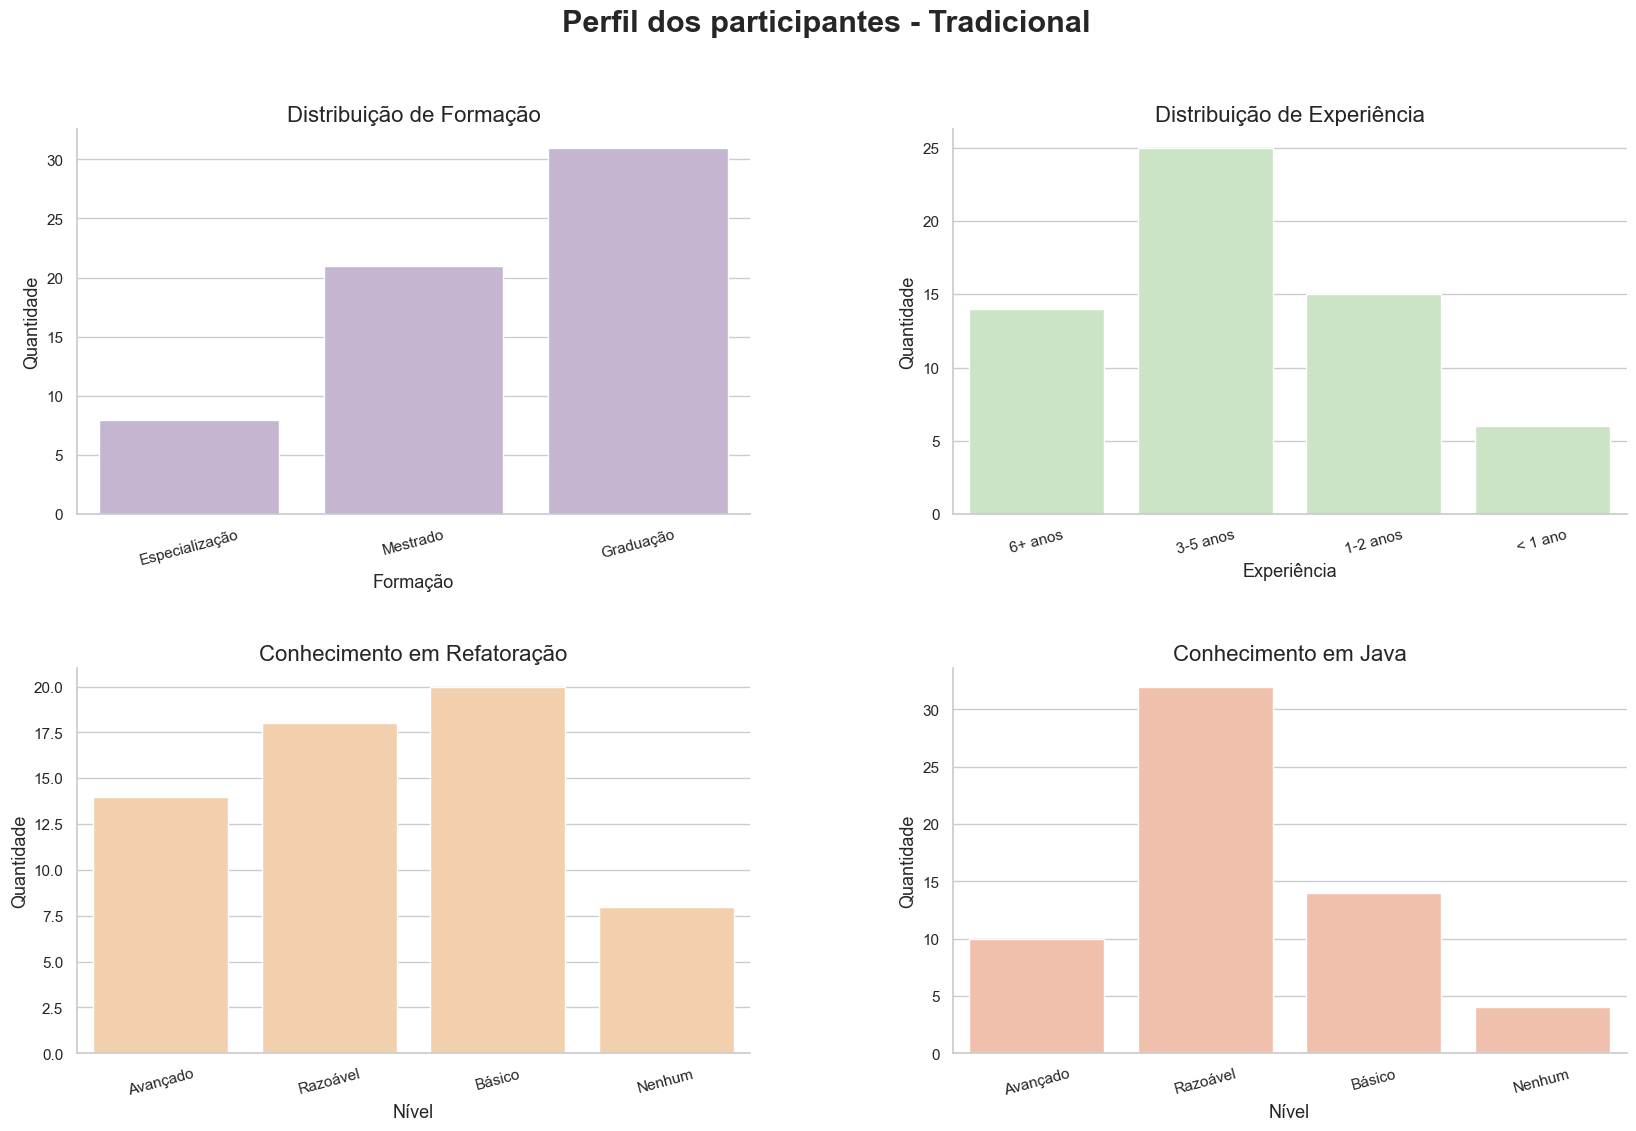

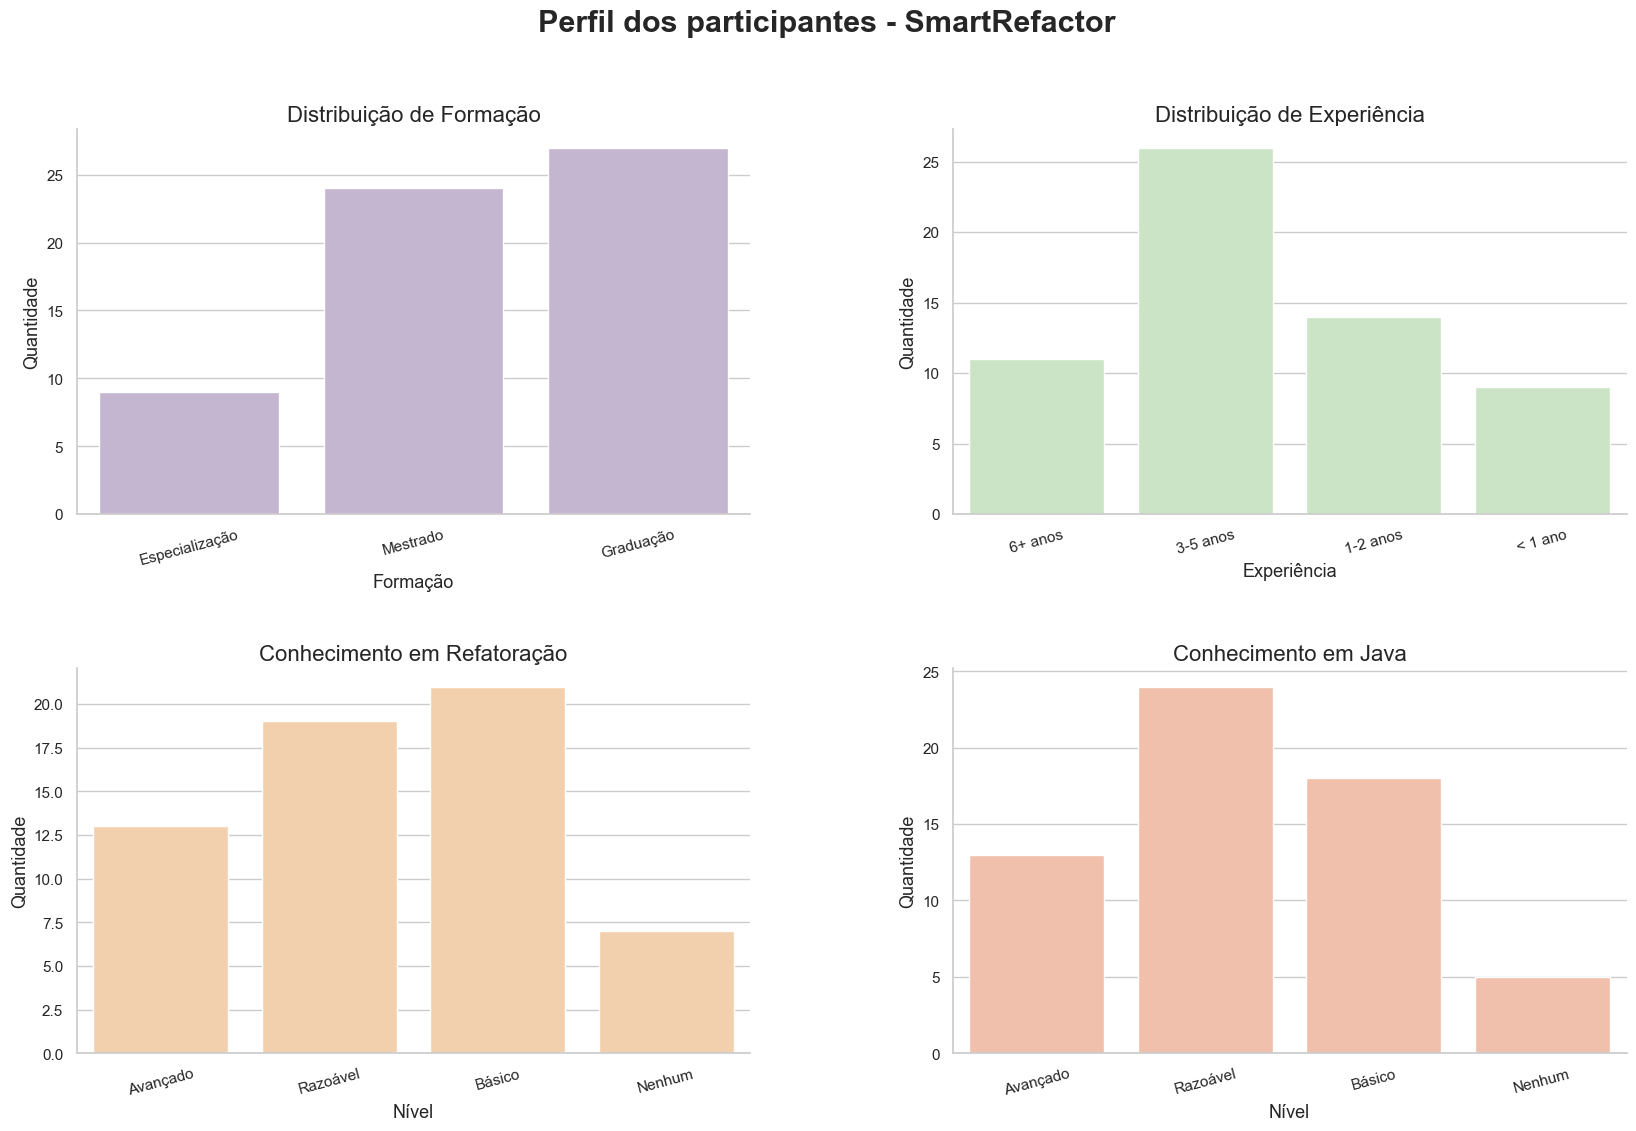

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo dos gráficos
sns.set_style("whitegrid")

# Cores únicas por gráfico (string, não lista)
paletas = {
    'Formacao': "#c5b0d5",  # roxo claro
    'Experiencia': "#c7e9c0",  # verde claro
    'Conhecimento_Refatoracao': "#fdd0a2",  # laranja claro
    'Conhecimento_Java': "#fcbba1"  # vermelho claro
}

def plots(df):
    fig, ax = plt.subplots(2, 2, figsize=(20, 12))
    ferramenta = df['Ferramenta'].iloc[0]
    fig.suptitle(f'Perfil dos participantes - {ferramenta}', fontsize=22, fontweight='bold')
    fig.subplots_adjust(wspace=0.3, hspace=0.4)

    # Plot 1 - Formação
    sns.countplot(x='Formacao', data=df, ax=ax[0, 0],
                  order=['Especialização', 'Mestrado', 'Graduação'],
                  color=paletas['Formacao'])
    ax[0, 0].set_title('Distribuição de Formação', fontsize=16)
    ax[0, 0].set_xlabel('Formação', fontsize=13)
    ax[0, 0].set_ylabel('Quantidade', fontsize=13)
    ax[0, 0].tick_params(axis='x', rotation=15)


    sns.countplot(x='Experiencia', data=df, ax=ax[0, 1], 
                  order=['6+ anos', '3-5 anos', '1-2 anos', '< 1 ano'],
                  color=paletas['Experiencia'])
    ax[0, 1].set_title('Distribuição de Experiência', fontsize=16)
    ax[0, 1].set_xlabel('Experiência', fontsize=13)
    ax[0, 1].set_ylabel('Quantidade', fontsize=13)
    ax[0, 1].tick_params(axis='x', rotation=15)


    sns.countplot(x='Conhecimento_Refatoracao', data=df, ax=ax[1, 0],
                  order=['Avançado', 'Razoável', 'Básico', 'Nenhum'],
                  color=paletas['Conhecimento_Refatoracao'])
    ax[1, 0].set_title('Conhecimento em Refatoração', fontsize=16)
    ax[1, 0].set_xlabel('Nível', fontsize=13)
    ax[1, 0].set_ylabel('Quantidade', fontsize=13)
    ax[1, 0].tick_params(axis='x', rotation=15)
    

    sns.countplot(x='Conhecimento_Java', data=df, ax=ax[1, 1],
                  order=['Avançado', 'Razoável', 'Básico', 'Nenhum'],
                  color=paletas['Conhecimento_Java'])
    ax[1, 1].set_title('Conhecimento em Java', fontsize=16)
    ax[1, 1].set_xlabel('Nível', fontsize=13)
    ax[1, 1].set_ylabel('Quantidade', fontsize=13)
    ax[1, 1].tick_params(axis='x', rotation=15)

    for a in ax.flatten():
        sns.despine(ax=a)

    plt.show()

# Exemplo de uso (supondo que os DataFrames existem)
plots(tradicional)
plots(smartRefactor)


### Medidas de tendência central associadas à ferramenta tradicional

In [17]:
tradicional.describe()

,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design
count,60.000000,60.000000,60.000000,60.000000
mean,2.480380,179.982632,2.316667,4.716667
std,0.385926,25.389531,1.396019,2.344063
min,1.522770,110.297178,0.000000,0.000000
25%,2.257430,167.450521,2.000000,3.000000
50%,2.505456,181.107809,2.000000,5.000000
75%,2.717416,194.738668,3.000000,6.000000
max,3.214068,228.271272,6.000000,11.000000


### Medidas de tendência central associadas à ferramenta SmartRefactor

In [18]:
smartRefactor.describe()

,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design
count,60.000000,60.000000,60.000000,60.000000
mean,2.043380,143.620952,0.866667,2.900000
std,0.366918,18.264064,0.853044,1.664179
min,1.078997,106.790499,0.000000,0.000000
25%,1.799212,131.398935,0.000000,2.000000
50%,2.030398,143.602046,1.000000,3.000000
75%,2.334308,156.821264,1.000000,4.000000
max,2.787737,191.197005,3.000000,7.000000


### Box-plots 
- comparação das distribuições entre as ferramentas tradicional e SmartRefactor

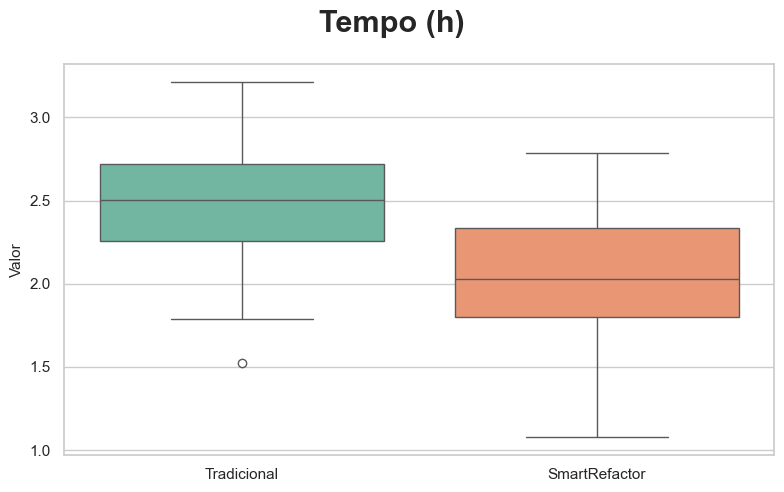

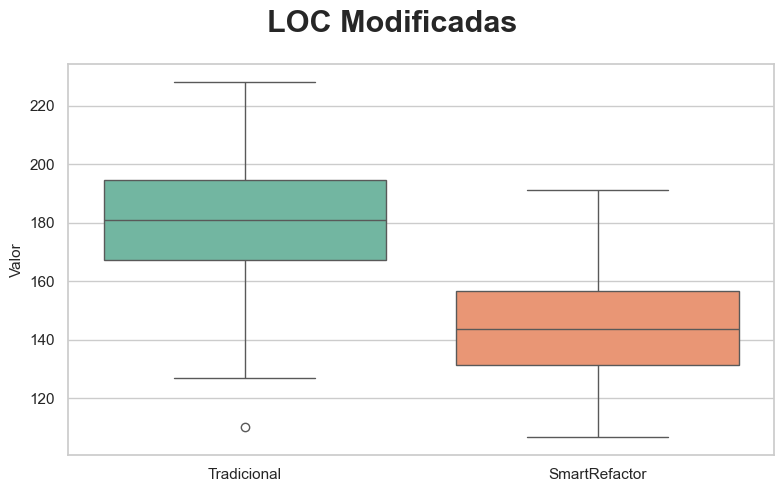

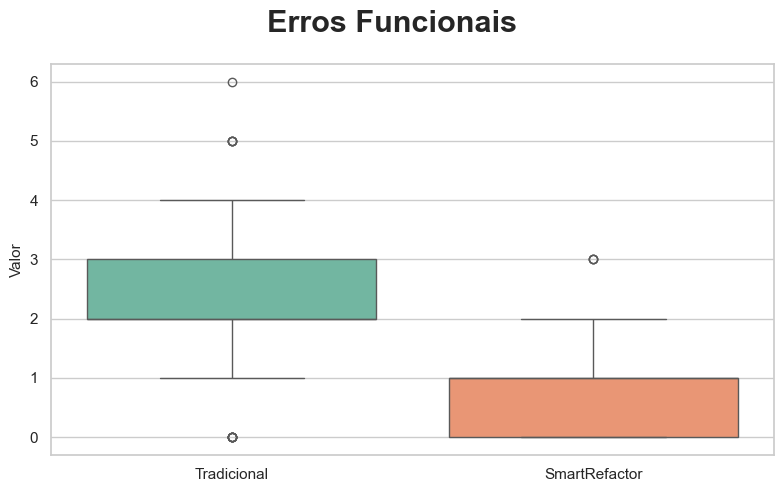

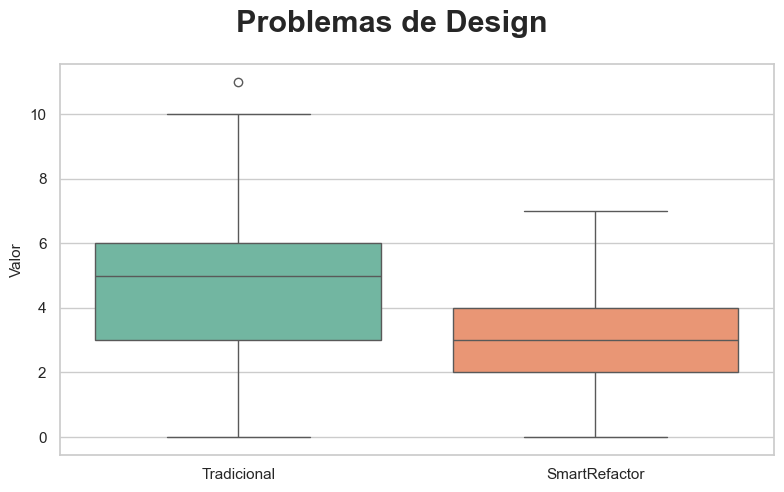

In [213]:
def boxplot(tradicional, smartRefactor):
    # Seleciona apenas colunas numéricas
    colunas_numericas = tradicional.select_dtypes(include='number').columns
    colunas_numericas = colunas_numericas.drop(['index'])

    for col in colunas_numericas:
        # Combina os dois dataframes em um único dataframe
        df_combined = pd.concat([
            tradicional[[col]].assign(Ferramenta='Tradicional'),
            smartRefactor[[col]].assign(Ferramenta='SmartRefactor')
        ])
        
        # Cria a figura para cada coluna
        plt.figure(figsize=(8, 5))

        # Título da figura
        plt.suptitle(f'{col}', fontsize=22, fontweight='bold')

        # Boxplot para os dois DataFrames no mesmo gráfico
        sns.boxplot(x='Ferramenta', y=col, data=df_combined, palette='Set2', hue='Ferramenta')

        # Títulos e rótulos
        plt.ylabel('Valor', fontsize=11)
        plt.xlabel('', fontsize=11)

        # Ajusta o layout para que os gráficos não se sobreponham
        plt.tight_layout()
        plt.show()

# Exemplo de uso
boxplot(tradicional, smartRefactor)


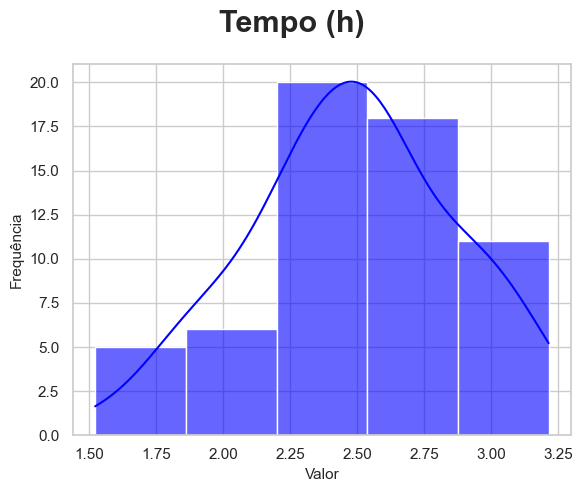

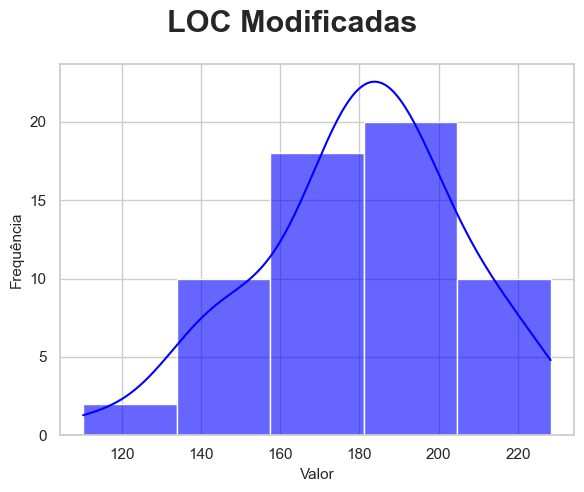

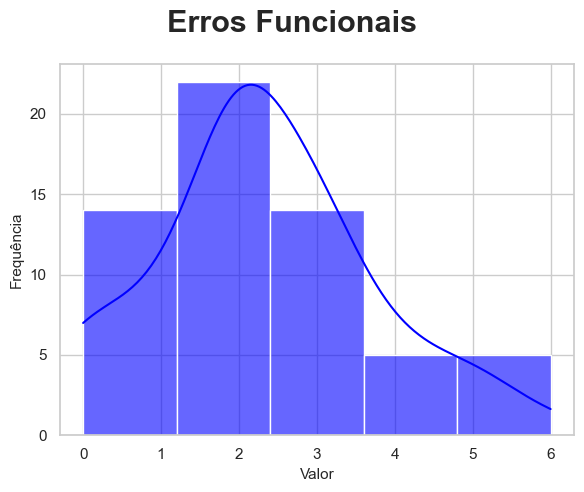

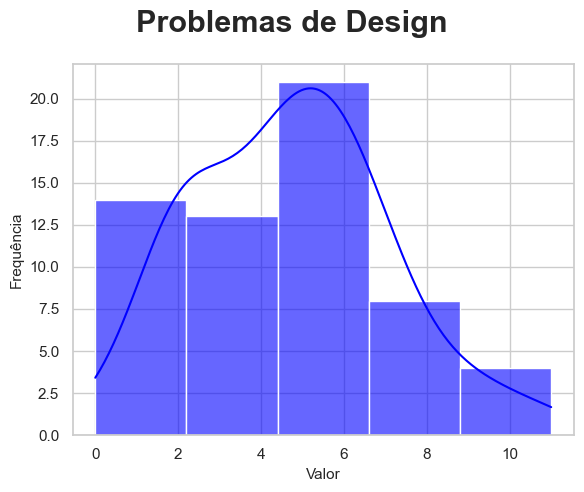

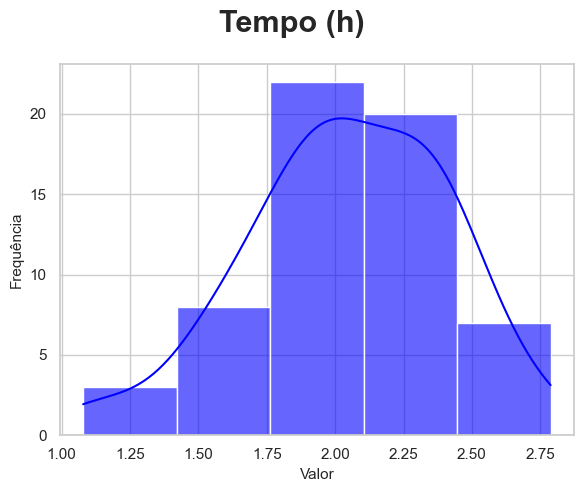

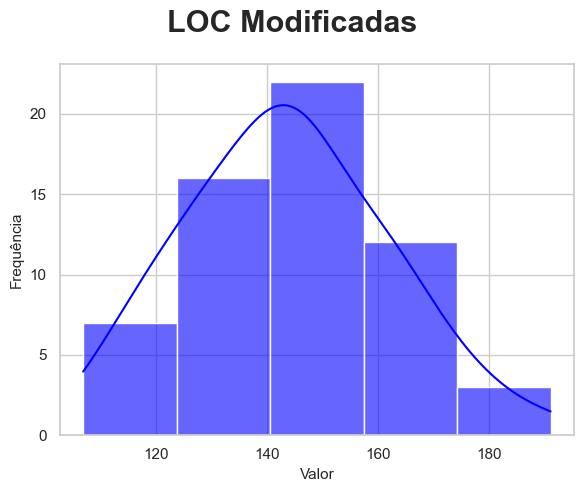

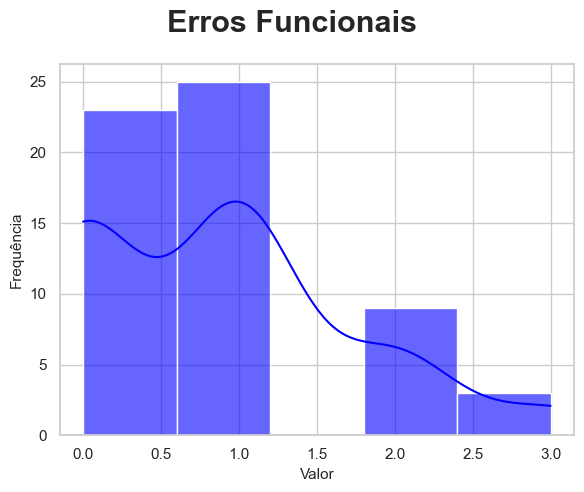

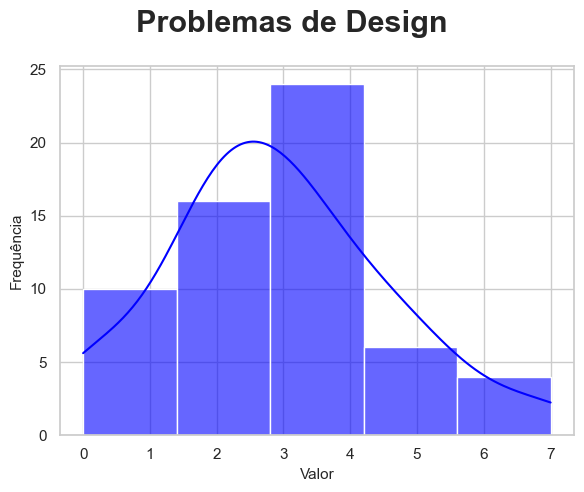

In [225]:
def hist(df):
    # Seleciona apenas colunas numéricas
    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_numericas = colunas_numericas.drop(['index'])

    for col in colunas_numericas:
        # Cria a figura para cada coluna
        plt.figure(figsize=(6, 5))

        # Título da figura
        plt.suptitle(f'{col}', fontsize=22, fontweight='bold')

        # Histograma para o DataFrame
        sns.histplot(df[col], bins=5, kde=True, color='blue', alpha=0.6)

        # Títulos e rótulos
        plt.ylabel('Frequência', fontsize=11)
        plt.xlabel('Valor', fontsize=11)

        # Ajusta o layout para que os gráficos não se sobreponham
        plt.tight_layout()
        plt.show()

# Exemplo de uso
hist(tradicional)
hist(smartRefactor)

### Histogramas

### Estatística Inferencial

In [144]:
from scipy.stats import kstest, zscore

normalidade = {
    'tradicional': {'param': [], 'nparam': []},
    'smartRefactor': {'param': [], 'nparam': []}
}

def teste_normalidade_ks(df, nome_df):
    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_numericas = colunas_numericas.drop(['index'])

    print(f"Teste de Kolmogorov-Smirnov - {nome_df}")
    print("---------------------------------------------------------------")

    for col in colunas_numericas:
        dados = df[col].dropna()
        dados_padronizados = zscore(dados)
        estatistica, p_valor = kstest(dados_padronizados, 'norm')
        print(f"{col}: estatística={estatistica:.4f}, p-valor={p_valor:.4f} -> ", end="")
        if p_valor > 0.05:
            print("Segue distribuição normal")
            normalidade[nome_df]['param'].append(col)
        else:
            print("Não segue distribuição normal")
            normalidade[nome_df]['nparam'].append(col)

# Executa os testes para os dois dataframes
teste_normalidade_ks(tradicional, 'tradicional')
print()
teste_normalidade_ks(smartRefactor, 'smartRefactor')


Teste de Kolmogorov-Smirnov - tradicional
---------------------------------------------------------------
Tempo (h): estatística=0.0644, p-valor=0.9510 -> Segue distribuição normal
LOC Modificadas: estatística=0.0978, p-valor=0.5801 -> Segue distribuição normal
Erros Funcionais: estatística=0.1905, p-valor=0.0222 -> Não segue distribuição normal
Problemas de Design: estatística=0.1121, p-valor=0.4082 -> Segue distribuição normal

Teste de Kolmogorov-Smirnov - smartRefactor
---------------------------------------------------------------
Tempo (h): estatística=0.0808, p-valor=0.7981 -> Segue distribuição normal
LOC Modificadas: estatística=0.0807, p-valor=0.7995 -> Segue distribuição normal
Erros Funcionais: estatística=0.2374, p-valor=0.0019 -> Não segue distribuição normal
Problemas de Design: estatística=0.1592, p-valor=0.0854 -> Segue distribuição normal


In [215]:
from scipy import stats

alpha = 0.05  # Nível de significância
# Teste t de Student para duas amostras independentes
t_stat, p_value = stats.ttest_ind(tradicional['LOC Modificadas'], smartRefactor['LOC Modificadas'])

# Verificando se rejeita ou não a hipótese nula
if p_value < alpha:
    print(f"Rejeita a hipótese nula (valor p = {p_value:.20f})")
else:
    print(f"Não rejeita a hipótese nula (valor p = {p_value:.20f})")


Rejeita a hipótese nula (valor p = 0.00000000000000447812)


In [ ]:
import pandas as pd
from scipy import stats

def aplicar_testes_individuais(df1, df2, nome_df1, nome_df2, normalidade_dict, alpha=0.05):
    print(f"\nTestes estatísticos para os DataFrames: {nome_df1} e {nome_df2}")
    print("---------------------------------------------------------------")

    # Teste t de Student para colunas paramétricas
    for col in normalidade_dict[nome_df1]['param']:
        dados1 = df1[col].dropna()
        dados2 = df2[col].dropna()
        
        t_stat, p_value = stats.ttest_ind(dados1, dados2)
        print(f"[T-test] {col}: t = {t_stat:.4f}, p = {p_value:.4f} -> ", end="")
        print("Rejeita H0 (médias diferentes)" if p_value < alpha else "Não rejeita H0 (médias iguais)")

    # Teste exato de Fisher para colunas não paramétricas
    for col in normalidade_dict[nome_df1]['nparam']:
        # Discretiza os dados em 2 bins
        dados1 = pd.cut(df1[col].dropna(), bins=2, labels=False)
        dados2 = pd.cut(df2[col].dropna(), bins=2, labels=False)

        # Frequências por categoria
        freq1 = dados1.value_counts().sort_index()
        freq2 = dados2.value_counts().sort_index()

        # Monta a tabela de contingência 2x2
        tabela = pd.DataFrame({'tradicional': freq1, 'smartRefactor': freq2}).T.fillna(0)

        # Aplica o teste de Fisher
        if tabela.shape == (2, 2):
            _, p_value = stats.fisher_exact(tabela)
            print(f"[Fisher] {col}: p = {p_value:.4f} -> ", end="")
            print("Rejeita H0 (distribuições diferentes)" if p_value < alpha else "Não rejeita H0 (distribuições semelhantes)")
        else:
            print(f"[Fisher] {col}: ERRO - Tabela não é 2x2 (bins inadequados)")

aplicar_testes_individuais(tradicional, smartRefactor, 'tradicional', 'smartRefactor', normalidade)



Testes estatísticos para os DataFrames: tradicional e smartRefactor
---------------------------------------------------------------
[T-test] Tempo (h): t = 6.3567, p = 0.0000 -> Rejeita H0 (médias diferentes)
[T-test] LOC Modificadas: t = 9.0054, p = 0.0000 -> Rejeita H0 (médias diferentes)
[T-test] Problemas de Design: t = 4.8950, p = 0.0000 -> Rejeita H0 (médias diferentes)
[Fisher] Erros Funcionais: p = 0.8140 -> Não rejeita H0 (distribuições semelhantes)


In [227]:
import pandas as pd
from scipy import stats

def aplicar_testes(tradicional, smartRefactor, nome_df1, nome_df2, normalidade, alpha=0.05):
    print(f"\nTestes estatísticos para os DataFrames: {nome_df1} e {nome_df2}")
    print("---------------------------------------------------------------")

    # Teste t de Student para colunas paramétricas
    for col in normalidade[nome_df1]['param']:

        t_stat, p_value = stats.ttest_ind(tradicional[col], smartRefactor[col])
        print(f"[T-test] {col}: t = {t_stat:.4f}, p = {p_value:.4f} -> ", end="")
        print("Rejeita H0 (médias diferentes)" if p_value < alpha else "Não rejeita H0 (médias iguais)")

    # Teste qui-quadrado de independência para colunas não paramétricas
    for col in normalidade[nome_df1]['nparam']:

        dados1 = pd.cut(tradicional[col], bins=4, labels=False)
        dados2 = pd.cut(smartRefactor[col], bins=4, labels=False)

        # Frequências por categoria
        freq1 = dados1.value_counts().sort_index()
        freq2 = dados2.value_counts().sort_index()

        

        # Monta a tabela de contingência
        tabela = pd.DataFrame({'tradicional': freq1, 'smartRefactor': freq2}).T.fillna(0)

        # Aplica o teste qui-quadrado de independência
        chi2, p_value, _, _ = stats.chi2_contingency(tabela)

        print(f"[Chi²] {col}: χ² = {chi2:.4f}, p = {p_value:.4f} -> ", end="")
        print("Rejeita H0 (distribuições diferentes)" if p_value < alpha else "Não rejeita H0 (distribuições semelhantes)")


aplicar_testes(tradicional, smartRefactor, 'tradicional', 'smartRefactor', normalidade)




Testes estatísticos para os DataFrames: tradicional e smartRefactor
---------------------------------------------------------------
[T-test] Tempo (h): t = 6.3567, p = 0.0000 -> Rejeita H0 (médias diferentes)
[T-test] LOC Modificadas: t = 9.0054, p = 0.0000 -> Rejeita H0 (médias diferentes)
[T-test] Problemas de Design: t = 4.8950, p = 0.0000 -> Rejeita H0 (médias diferentes)
[Chi²] Erros Funcionais: χ² = 5.8157, p = 0.1209 -> Não rejeita H0 (distribuições semelhantes)


In [164]:
import numpy as np
from scipy.stats import chi2_contingency

# Dados
# erros_tradicional = [3, 2, 2, 0, 5, 3, 1, 2, 2, 3, 1, 4, 3, 1, 5, 3, 2, 2, 4, 5]
# erros_smart = [2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0]

erros_tradicional = tradicional['Erros Funcionais'].tolist()
erros_smart = smartRefactor['Erros Funcionais'].tolist()

# Criar tabela de contingência
valores_unicos = np.unique(erros_tradicional + erros_smart)
tabela = np.zeros((len(valores_unicos), 2), dtype=int)

for i, valor in enumerate(valores_unicos):
    tabela[i, 0] = erros_tradicional.count(valor)
    tabela[i, 1] = erros_smart.count(valor)

# Teste do qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

# Resultados
print("Tabela de contingência (Observado):")
print(tabela)
print("\nEstatística do qui-quadrado:", chi2)
print("Valor-p:", p)
print("Graus de liberdade:", dof)
print("\nFrequências esperadas sob H₀:")
print(expected)

if p < 0.05:
    print("\nConclusão: Há diferença significativa (rejeita H₀).")
else:
    print("\nConclusão: Não há diferença significativa (não rejeita H₀).")

Tabela de contingência (Observado):
[[ 7 23]
 [ 7 25]
 [22  9]
 [14  3]
 [ 5  0]
 [ 4  0]
 [ 1  0]]

Estatística do qui-quadrado: 41.22759329538267
Valor-p: 2.611575908362013e-07
Graus de liberdade: 6

Frequências esperadas sob H₀:
[[15.  15. ]
 [16.  16. ]
 [15.5 15.5]
 [ 8.5  8.5]
 [ 2.5  2.5]
 [ 2.   2. ]
 [ 0.5  0.5]]

Conclusão: Há diferença significativa (rejeita H₀).
